<a href="https://colab.research.google.com/github/MirzaSaniya/Data-Analytics-Project/blob/main/Boston_permit_Dataset_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

# Boston Permit Dataset Analysis

# Descriptive Statistics

- Essential part of EDA (Exploratory Data Analysis)
- Provide summary of existing data--from summarizations to distributions, extreme values, missing data, _etc._
- Univariate _vs._ Multivariate

### The code below attempts to download the Moving Permits Dataset from:
https://data.boston.gov/dataset/open-moving-truck-permits

In [ ]:
data_url = 'https://data.boston.gov/dataset/5b83680a-0df4-45b0-94e0-9ab1c420d0d2/resource/fde6709d-62a7-4523-a8eb-76eac2004f4b/download/tmpxm9gs6rg.csv'
my_df = pd.read_csv(data_url, dtype={'zip': object, 'issued_date': object})

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### IMPORTANT: Note the warning given by `pandas` above: you should already know how to fix the issue. (Hint: explicit settting of data types using the `dtype` argument)

In [ ]:
my_df.head()

,permitnumber,worktype,permittypedescr,description,comments,applicationmethod,applicant_city,applicant_state,applicant_zip,is_contractor,total_fees,issued_date,expiration_date,status,occupancytype,city,state,zip,lat,long
0,OCCU-129161,Movetrucks,Street Occupancy Permit,Moving Trucks,NaN,InPersonPermit,Woburn,MA,01801,N,177,2012-04-03 15:31:00,2012-04-20 00:00:00,EXPIRED,NaN,Charlestown,MA,2129.0,42.377010,-71.064770
1,OCCU-132217,Movetrucks,Street Occupancy Permit,Moving Trucks,NaN,InPersonPermit,BRIGHTON,MA,02135,N,69,2012-04-13 14:25:19,2012-04-29 00:00:00,EXPIRED,NaN,Brighton,MA,2135.0,42.338620,-71.148610
2,OCCU-134856,Movetrucks,Street Occupancy Permit,Moving Trucks,NaN,InPersonPermit,Boston,MA,02116,N,774,2015-04-13 11:51:47,2015-05-17 00:00:00,EXPIRED,NaN,Boston,MA,2116.0,42.352225,-71.064909
3,OCCU-140359,Movetrucks,Street Occupancy Permit,Moving Trucks,NaN,InPersonPermit,BRIGHTON,MA,02135,N,69,2012-05-10 09:32:41,2012-09-01 00:00:00,EXPIRED,NaN,Boston,MA,2114.0,42.359840,-71.067600
4,OCCU-129027,Movetrucks,Street Occupancy Permit,Moving Trucks,NaN,InPersonPermit,BRIGHTON,MA,02135,N,69,2012-04-03 12:05:59,2012-04-07 00:00:00,EXPIRED,NaN,South Boston,MA,2127.0,42.334970,-71.039760


In [ ]:
my_df.describe(include='all')


,permitnumber,worktype,permittypedescr,description,comments,applicationmethod,applicant_city,applicant_state,applicant_zip,is_contractor,total_fees,issued_date,expiration_date,status,occupancytype,city,state,zip,lat,long
count,97478,97478,97478,97478,82648,97478,97441,97445,96665,97478,97478.000000,97478,97478,97478,1,97437,97478,97414,87072.000000,87072.000000
unique,95546,1,1,1,4373,2,722,40,861,2,NaN,79822,2516,2,1,48,1,40,NaN,NaN
top,OCCU-578923,Movetrucks,Street Occupancy Permit,Moving Trucks,STAND MOVING TRUCK AT CURB// ALL WORK 7AM-5PM,InPersonPermit,Boston,MA,02135,N,NaN,2016-04-11 14:54:49,2018-09-01 00:00:00,EXPIRED,Other,Boston,MA,2116.0,NaN,NaN
freq,17,97478,97478,97478,20565,80080,36769,96537,25457,97470,NaN,18,1034,97322,1,53549,97478,15033,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.510556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.347569,-71.079272
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.079206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.017206,0.028943
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.235310,-71.174407
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.340250,-71.087980
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.348850,-71.072413
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.358930,-71.061855


### Let's also examine the `tips` dataset from last week's lecture

In [ ]:
tips = sns.load_dataset('tips')
tips.head()
tips.describe(include='all')

,total_bill,tip,sex,smoker,day,time,size
count,244.000000,244.000000,244,244,244,244,244.000000
unique,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,157,151,87,176,NaN
mean,19.785943,2.998279,NaN,NaN,NaN,NaN,2.569672
std,8.902412,1.383638,NaN,NaN,NaN,NaN,0.951100
min,3.070000,1.000000,NaN,NaN,NaN,NaN,1.000000
25%,13.347500,2.000000,NaN,NaN,NaN,NaN,2.000000
50%,17.795000,2.900000,NaN,NaN,NaN,NaN,2.000000
75%,24.127500,3.562500,NaN,NaN,NaN,NaN,3.000000


#### Exploring variable distributions:

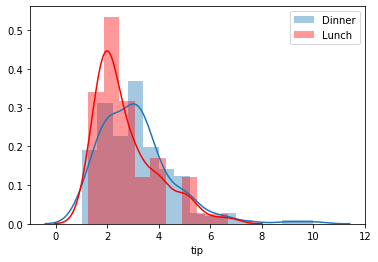

In [ ]:
import matplotlib.pyplot as plt

dinner_tips = tips.loc[tips['time']=='Dinner', 'tip']
lunch_tips = tips.loc[tips['time']=='Lunch', 'tip']
sns.distplot(dinner_tips)
sns.distplot(lunch_tips, color='red')
plt.legend(['Dinner', 'Lunch'])

# Predictive Analytics

- Goal is to reach conclusions that go beyond the existing (historical) data
- Predictive _vs._ Prescriptive: providing actionable insights

## Statsmodels
#### https://www.statsmodels.org
- `Python` module that provides functions and classes for statistical tests and models
- Simulates an `R`-like `formula` syntax but is tightly-integrated with `Python` and `pandas`

### Basic T and Z tests

In [ ]:
from statsmodels.stats import weightstats as weightstats
weightstats.ttest_ind(x1=dinner_tips, x2=lunch_tips, alternative='larger')

(1.9062569301202392, 0.02890076737585779, 242.0)

In [ ]:
weightstats.ztest(x1=dinner_tips, x2=lunch_tips)

(1.9062569301202392, 0.05661687925222567)

### Linear Model (OLS)
Let's try to predict tups as a function of the total bill:

$Tip = \beta_0 + \beta_1 * TotalBill + \varepsilon$

In [ ]:
import statsmodels.formula.api as smf

In [ ]:
results_1 = smf.ols('tip ~ total_bill', data = tips).fit()
print(results_1.params)
results_1.summary()

Intercept     0.920270
total_bill    0.105025
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Wed, 04 Dec 2019   Prob (F-statistic):           6.69e-34
Time:                        06:26:54   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9203      0.160      5.761      0.000       0.606       1.235
total_bill     0.1050      0.007     14.260      0.000       0.091       0.120
==============================================================================
Omnibus:                       20.185   Durbin-Watson:                   2.151
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.750
Skew:                           0.443   Prob(JB):                     6.35e-09
Kurtosis:                       4.711   Cond. No.                         53.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 1.0, 'Trend of tip with total_bill')

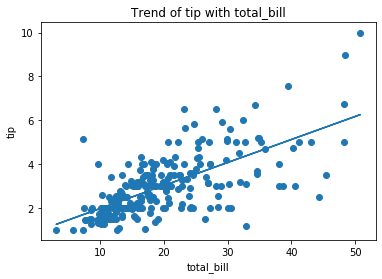

In [ ]:
plt.scatter(tips.total_bill, tips.tip)
plt.plot(tips.total_bill, results_1.fittedvalues)
plt.xlabel('total_bill')
plt.ylabel('tip')
plt.title('Trend of tip with total_bill')

### Or, we can explore an alternative linear model:
$Tip = \beta_0 + \beta_1 * TotalBill + \beta_2 * TotalBill^2 + \varepsilon$

In [ ]:
tips['total_bill_sq'] = tips['total_bill'] ** 2
tips.head()

,total_bill,tip,sex,smoker,day,time,size,total_bill_sq
0,16.99,1.01,Female,No,Sun,Dinner,2,288.6601
1,10.34,1.66,Male,No,Sun,Dinner,3,106.9156
2,21.01,3.50,Male,No,Sun,Dinner,3,441.4201
3,23.68,3.31,Male,No,Sun,Dinner,2,560.7424
4,24.59,3.61,Female,No,Sun,Dinner,4,604.6681


In [ ]:
results_2 = smf.ols('tip ~ total_bill + total_bill_sq', data = tips).fit()
print(results_2.params)
results_2.summary()

Intercept        0.891117
total_bill       0.107856
total_bill_sq   -0.000057
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     101.3
Date:                Wed, 04 Dec 2019   Prob (F-statistic):           1.20e-32
Time:                        06:26:54   Log-Likelihood:                -350.53
No. Observations:                 244   AIC:                             707.1
Df Residuals:                     241   BIC:                             717.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.8911      0.347      2.570      0.011       0.208       1.574
total_bill        0.1079      0.031      3.505      0.001       0.047       0.168
total_bill_sq  -5.71e-05      0.001     -0.095      0.925      -0.001       0.001
==============================================================================
Omnibus:                       20.702   Durbin-Watson:                   2.148
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.131
Skew:                           0.451   Prob(JB):                     3.18e-09
Kurtosis:                       4.742   Cond. No.                     3.47e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.47e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0.5, 1.0, 'Trend of tip with total_bill')

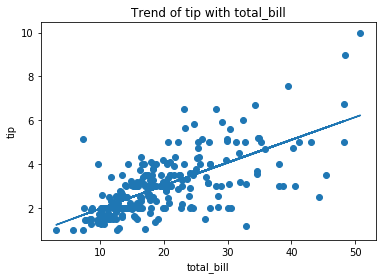

In [ ]:
plt.scatter(tips.total_bill, tips.tip)
plt.plot(tips.total_bill, results_2.fittedvalues)
plt.xlabel('total_bill')
plt.ylabel('tip')
plt.title('Trend of tip with total_bill')

In [ ]:
import patsy
tips['ratio'] = tips['tip']/tips['total_bill']*100.00
tips['tip_gt_20'] = (tips['tip']/tips['total_bill'] > 0.2).astype(np.float32)
tips['tip_gt_20'].mean()


0.1598360687494278

In [ ]:
tips.head(7)

,total_bill,tip,sex,smoker,day,time,size,total_bill_sq,tip_gt_20,ratio
0,16.99,1.01,Female,No,Sun,Dinner,2,288.6601,0.0,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,106.9156,0.0,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,441.4201,0.0,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,560.7424,0.0,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,604.6681,0.0,14.680765
5,25.29,4.71,Male,No,Sun,Dinner,4,639.5841,0.0,18.623962
6,8.77,2.00,Male,No,Sun,Dinner,2,76.9129,1.0,22.805017


In [ ]:
tips.tail(7)

,total_bill,tip,sex,smoker,day,time,size,total_bill_sq,tip_gt_20,ratio
237,32.83,1.17,Male,Yes,Sat,Dinner,2,1077.8089,0.0,3.563814
238,35.83,4.67,Female,No,Sat,Dinner,3,1283.7889,0.0,13.033771
239,29.03,5.92,Male,No,Sat,Dinner,3,842.7409,1.0,20.392697
240,27.18,2.00,Female,Yes,Sat,Dinner,2,738.7524,0.0,7.358352
241,22.67,2.00,Male,Yes,Sat,Dinner,2,513.9289,0.0,8.822232
242,17.82,1.75,Male,No,Sat,Dinner,2,317.5524,0.0,9.820426
243,18.78,3.00,Female,No,Thur,Dinner,2,352.6884,0.0,15.974441


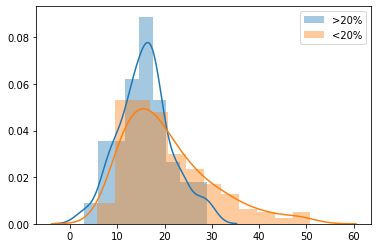

In [ ]:
y, X = patsy.dmatrices('tip_gt_20 ~ total_bill', data=tips)
sns.distplot(X[y[:,0] > 0, 1])
sns.distplot(X[y[:,0] == 0, 1])
plt.legend(['>20%', '<20%'])

### We can also fit a Logistic Regression

In [ ]:
model = smf.logit(y,X)
result = model.fit()
result.summary()

PatsyError: ignored

#### One way to visualize the performance of the model

In [ ]:
yhat = result.predict(X)
sns.distplot(yhat[y[:,0] > 0])
sns.distplot(yhat[y[:,0] == 0])

#### Another approach to qunatify performance is to use the `metrics` module in `scikit-learn`

In [ ]:
import sklearn.metrics
yhat = result.predict(X) > 0.20
print(sklearn.metrics.classification_report(y,yhat))

## Scikit-Learn Example of a Linear Regression

The Scikit-Learn example can be found here
https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py

In [ ]:
from sklearn import linear_model

X = tips[['total_bill']]
y = tips['tip'].values

model = linear_model.LinearRegression(fit_intercept=False)
res = model.fit(X, y)
plt.plot(X['total_bill'], y, '.')
plt.plot(X['total_bill'], model.predict(X), '.')
plt.legend(['actual tip', 'predicted tip'])

## Scikit-Learn Example of a Random Forrest Regression

In [ ]:
from sklearn import ensemble
ensemble_model = ensemble.RandomForestRegressor()
ensemble_model.fit(X,y)

In [ ]:
plt.plot(X[['total_bill']], y, 'r.')
plt.plot(X[['total_bill']], ensemble_model.predict(X), 'g.')
plt.legend(['actual tip', 'predicted tip'])